# EDA part 2

## I. Imports & functions

In [24]:
import pandas as pd
import pycountry_convert as pc
import pycountry
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
# from fancyimpute import knn
from sklearn.impute import KNNImputer
import plotly.express as px
from sklearn.metrics import mean_squared_error
import skfda

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

data = pd.read_csv('data/final_data.csv')
data = data[data.year != 2020] # 16 out of 26 indexes missing

## II. Imputation

In [25]:
# # resampling the data and filling missing values; getting rid of duplicates at the same time
# new_data = data.resample('60min').mean() 
# new_data = new_data.fillna(method = 'pad') # using only past data

In [26]:
# https://conferences.oreilly.com/strata/strata-ny-2019/cdn.oreillystatic.com/en/assets/1/event/300/Handling%20data%20gaps%20in%20time%20series%20using%20imputation%20Presentation.pdf
# https://www.kaggle.com/oguzkaanmavice/time-series-deal-with-missing-values
# https://impyute.readthedocs.io/en/master/api/time_series_imputation.html
# https://www.aptech.com/blog/introduction-to-the-fundamentals-of-panel-data/
# https://drive.google.com/file/d/1-NqVpF3__iKll7qvAu3Ebcx76DE-d2yH/view

### CO2 emission - best imputation

<AxesSubplot:title={'center':'co2_emission'}>

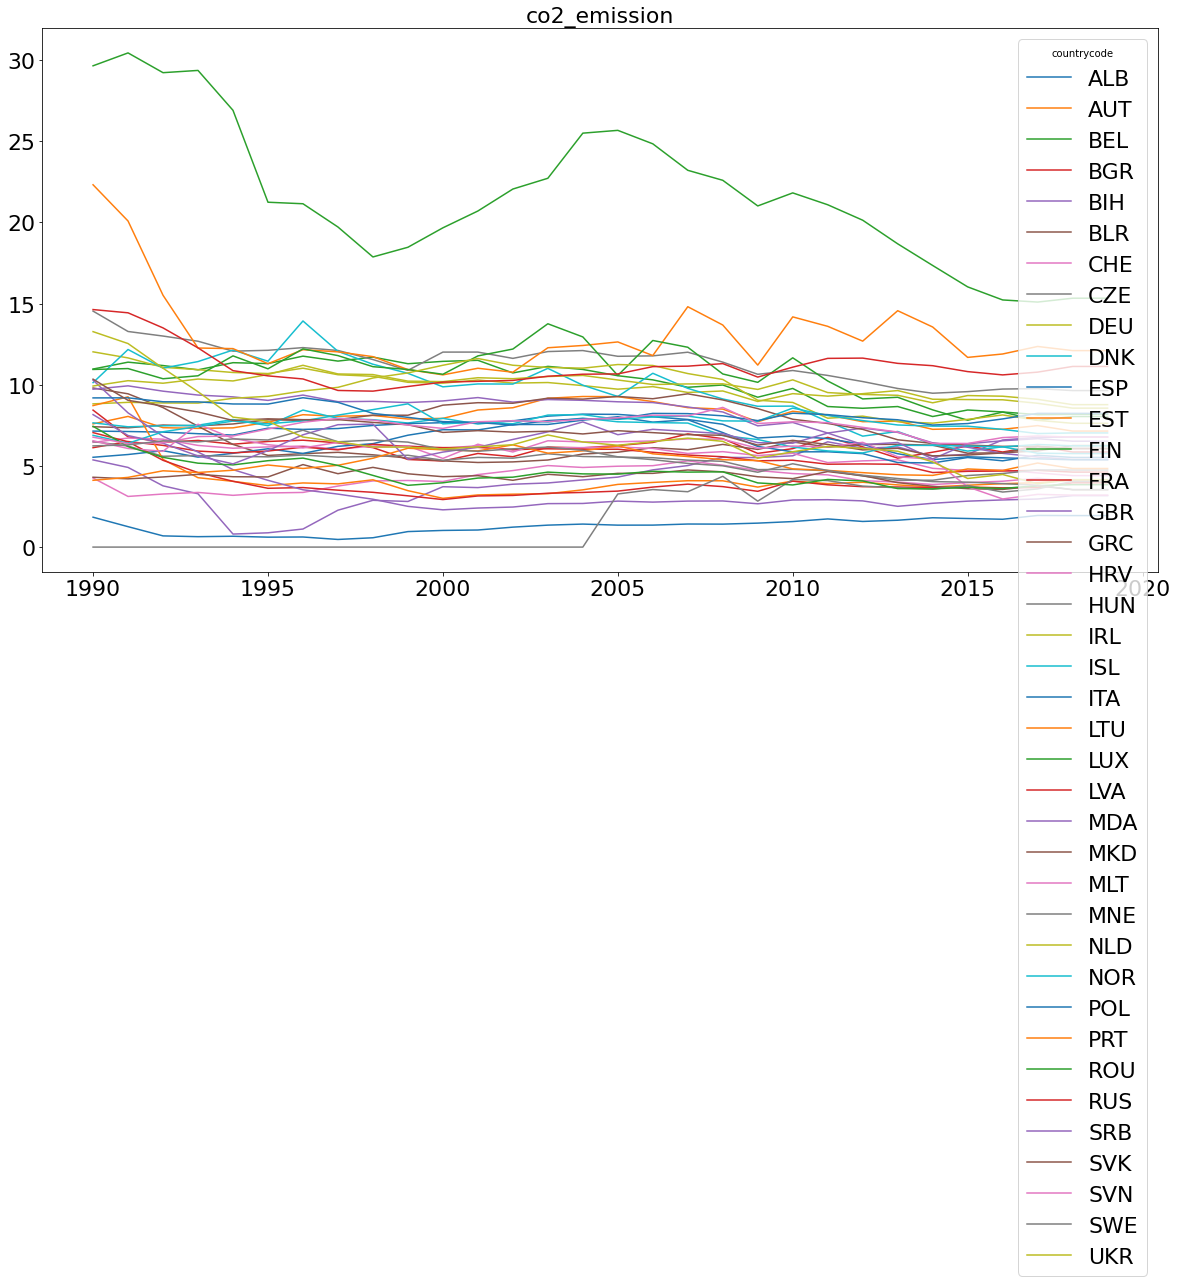

In [27]:
# data_co2 = data[['year','co2_emission']].copy()
# data.loc[data.year == 2018, 'co2_emission'] = np.NaN

data['co2_emission'].fillna(method = 'pad', inplace = True)
# mean_squared_error(data[data.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
# 0.0457

# data.co2_emission = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 13])
# mean_squared_error(data[data.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
# 6.0187

# data.co2_emission.interpolate(method = 'spline',order = 2, inplace = True)
# mean_squared_error(data[data.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
# 7.1593

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='co2_emission').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='co2_emission')


### Employment_agro - best imputation

<AxesSubplot:title={'center':'employment_agro'}>

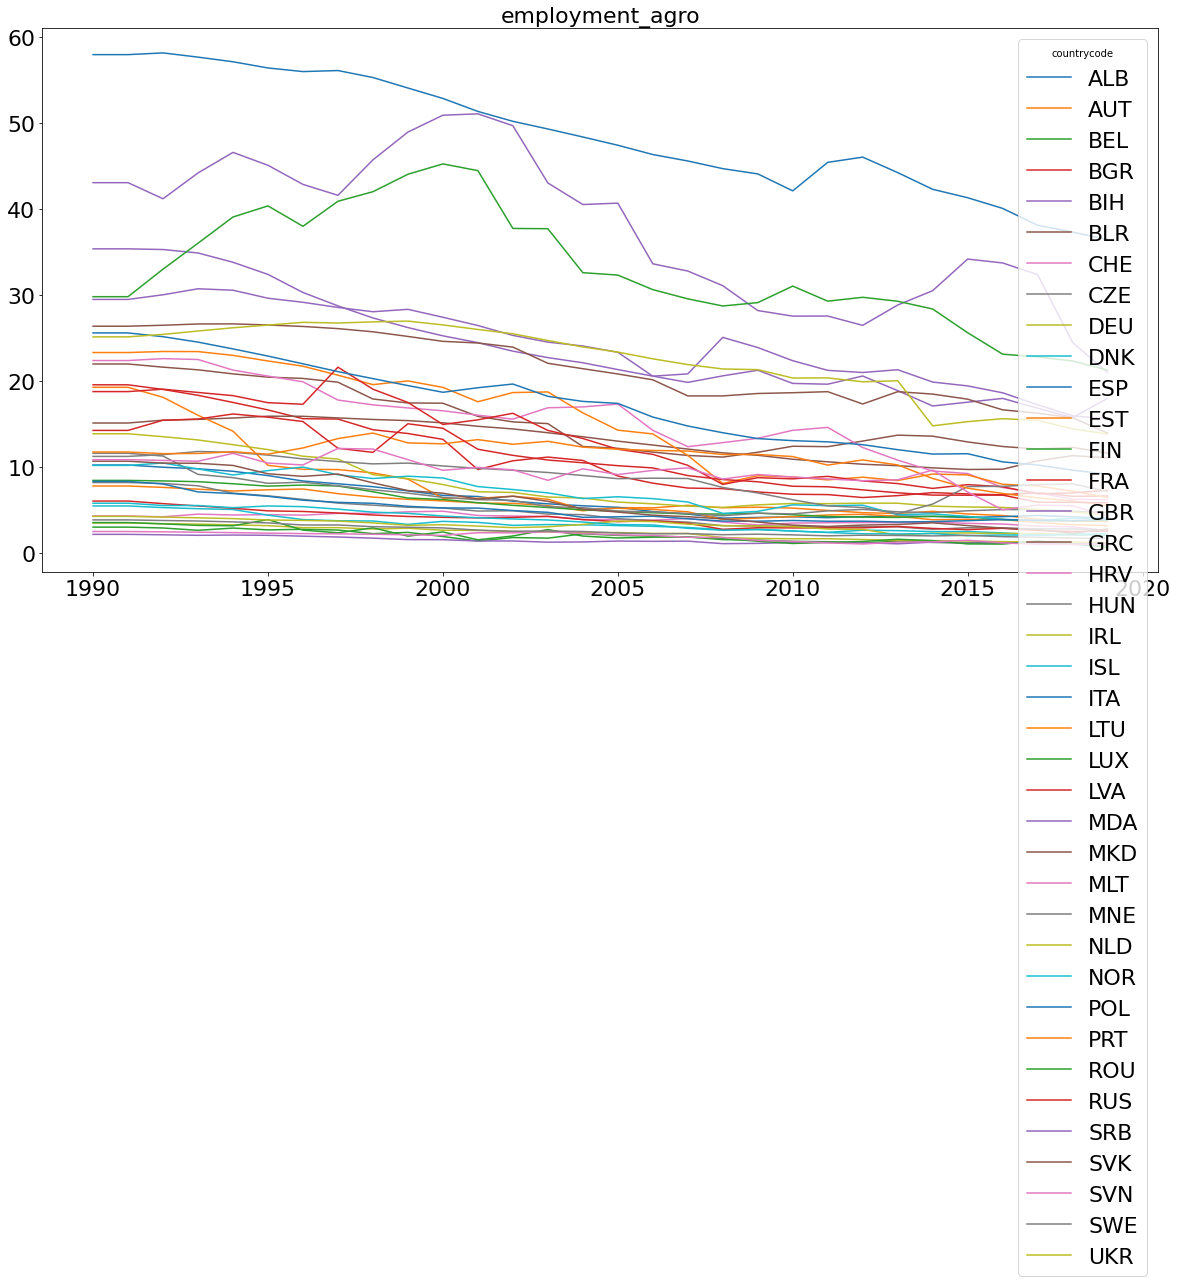

In [28]:
# data_agro = data[['year','employment_agro']].copy()
# data.loc[data.year == 1991, 'employment_agro'] = np.NaN

data['employment_agro'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].employment_agro, data_agro[data_agro.year == 1991].employment_agro)
# 0.4787

# data.employment_agro = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 14])
# mean_squared_error(data[data.year == 1991].employment_agro, data_agro[data_agro.year == 1991].employment_agro)
# 42.0754

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_agro').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_agro')

### Employment_industry - best imputation

<AxesSubplot:title={'center':'employment_industry'}>

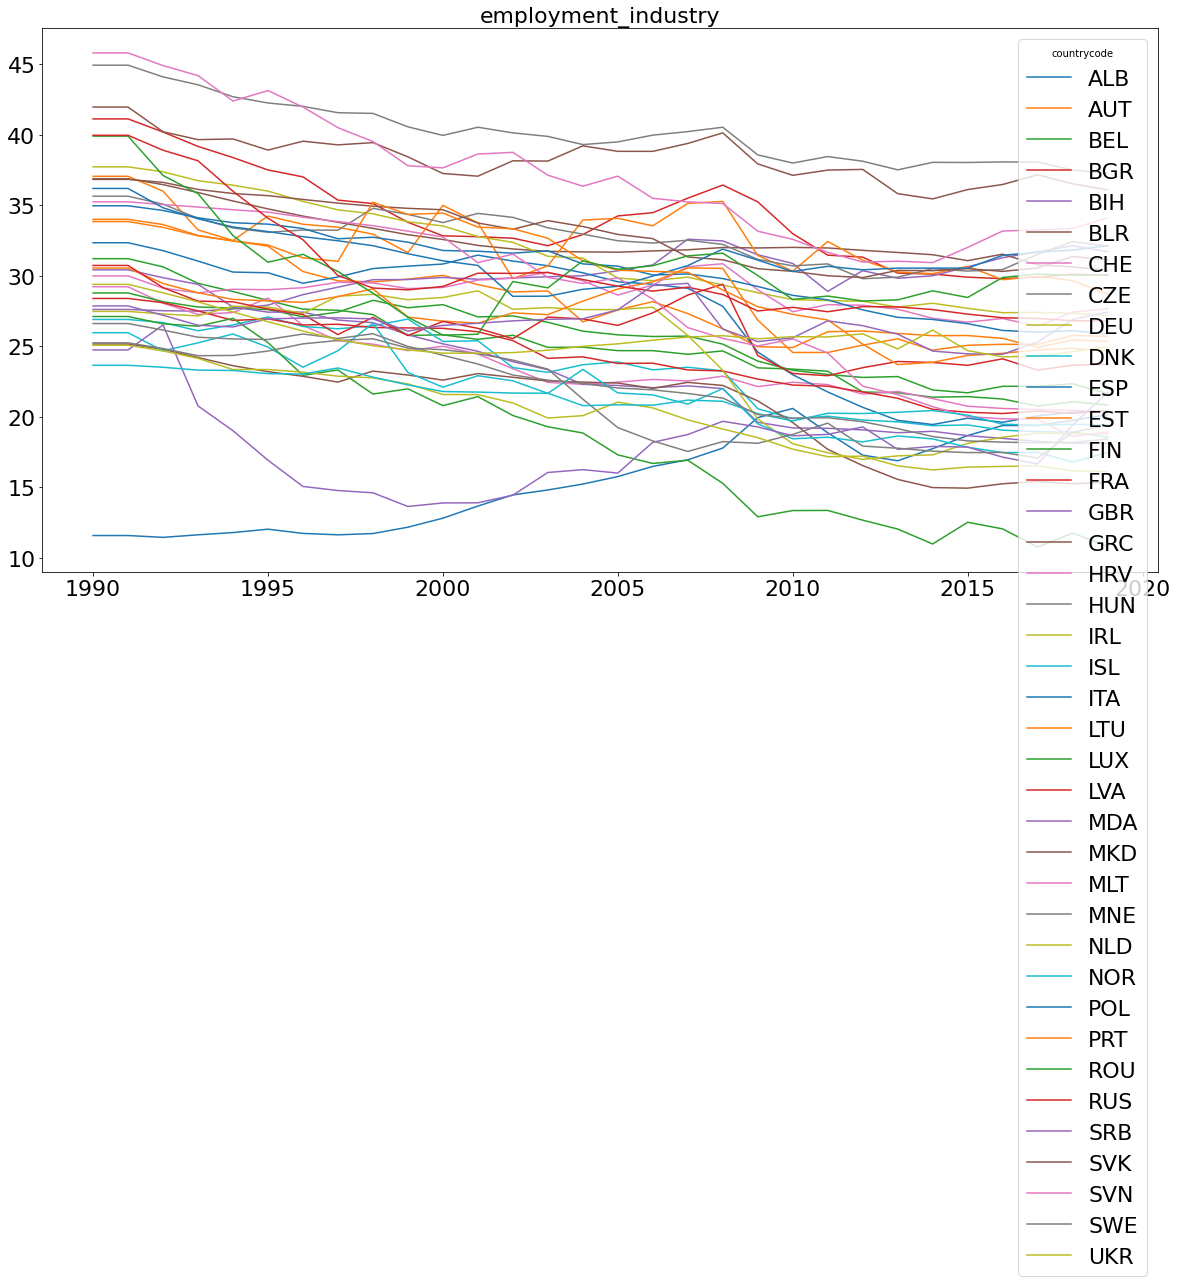

In [29]:
# data_ind = data[['year','employment_industry']].copy()
# data.loc[data.year == 1991, 'employment_industry'] = np.NaN

data['employment_industry'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].employment_industry, data_ind[data_ind.year == 1991].employment_industry)
# 0.8279

# data.employment_industry = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 15])
# mean_squared_error(data[data.year == 1991].employment_industry, data_ind[data_ind.year == 1991].employment_industry)
# 23.7939

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_industry').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_industry')

### Employment_services - best imputation

<AxesSubplot:title={'center':'employment_services'}>

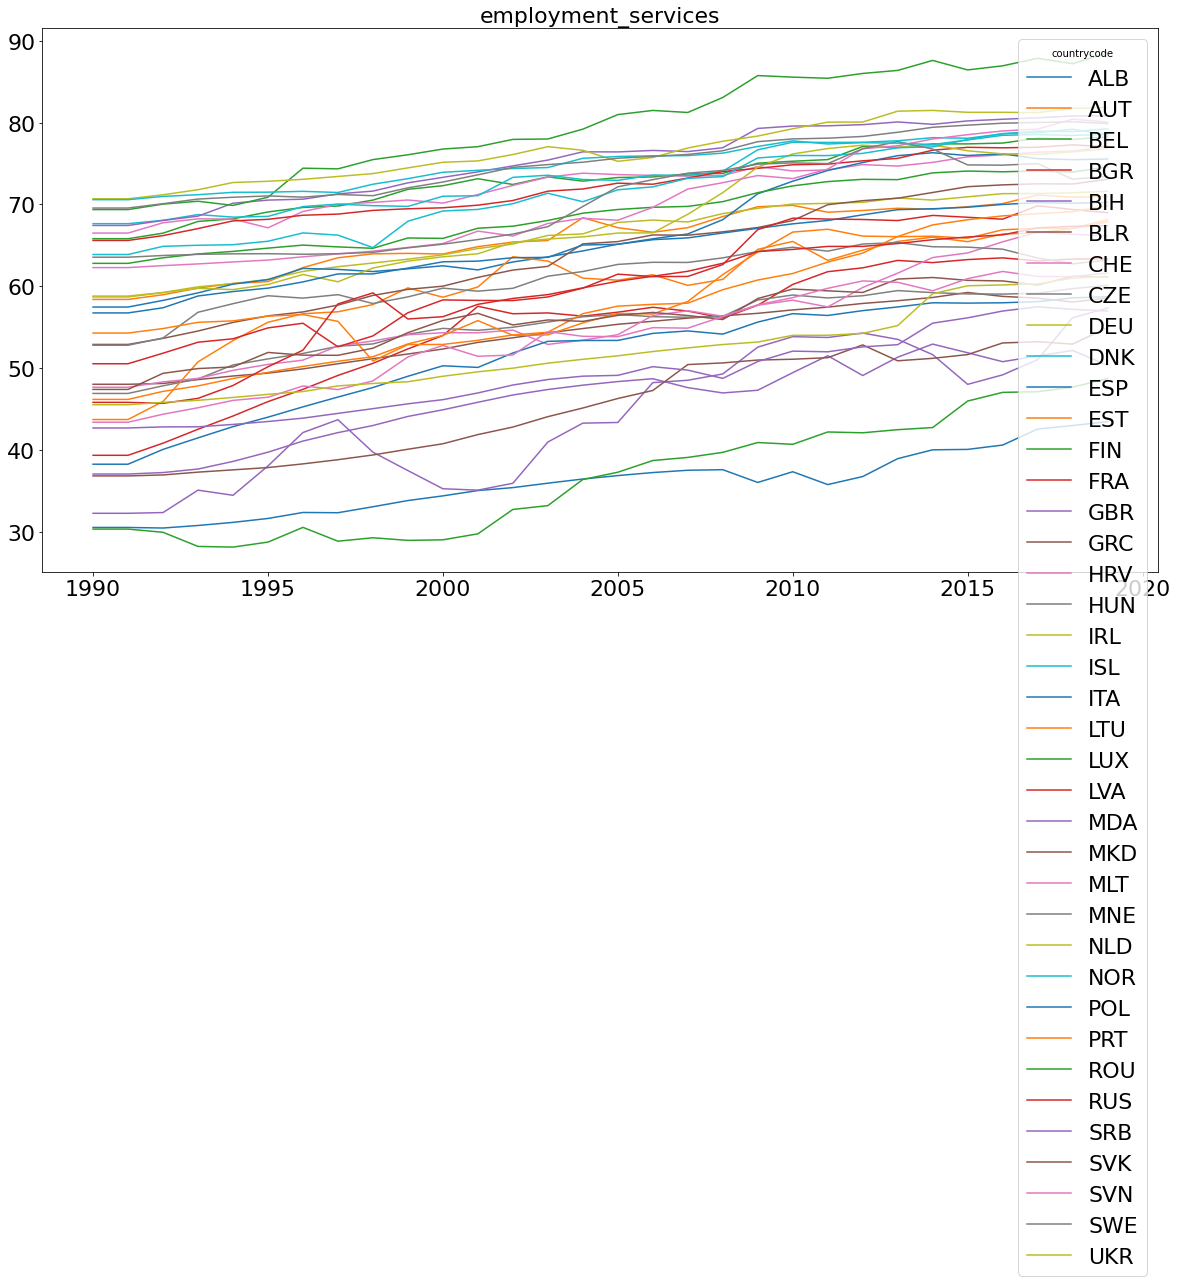

In [30]:
# data_serv = data[['year','employment_services']].copy()
# data.loc[data.year == 1991, 'employment_services'] = np.NaN

data['employment_services'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].employment_services, data_serv[data_serv.year == 1991].employment_services)
# 0.7322

# data.employment_services = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 16])
# mean_squared_error(data[data.year == 1991].employment_services, data_serv[data_serv.year == 1991].employment_services)
# 54.3532

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_services').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_services')

### Unemployment - best imputation

<AxesSubplot:title={'center':'unemployment'}>

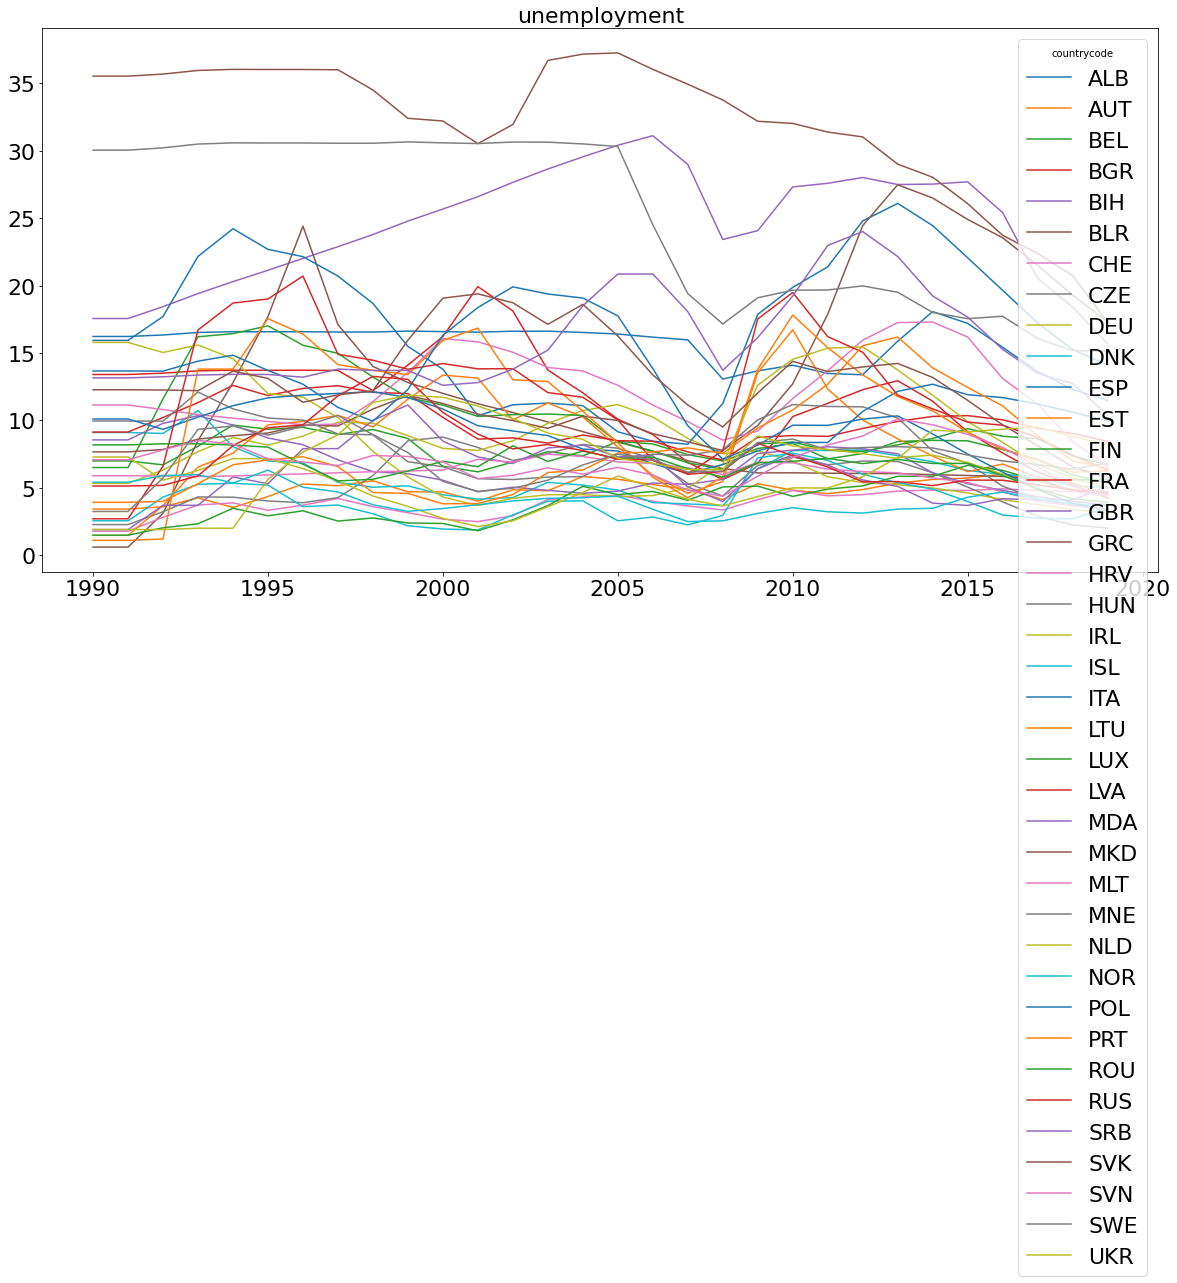

In [31]:
# data_uemp = data[['year','unemployment']].copy()
# data.loc[data.year == 1991, 'unemployment'] = np.NaN

data['unemployment'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[data.year == 1991].unemployment, data_uemp[data_uemp.year == 1991].unemployment)
# 2.0499

# data.unemployment = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 24])
# mean_squared_error(data[data.year == 1991].unemployment, data_uemp[data_uemp.year == 1991].unemployment)
# 31.0302

df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='unemployment').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='unemployment')

### Export - best imputation

<AxesSubplot:title={'center':'export'}>

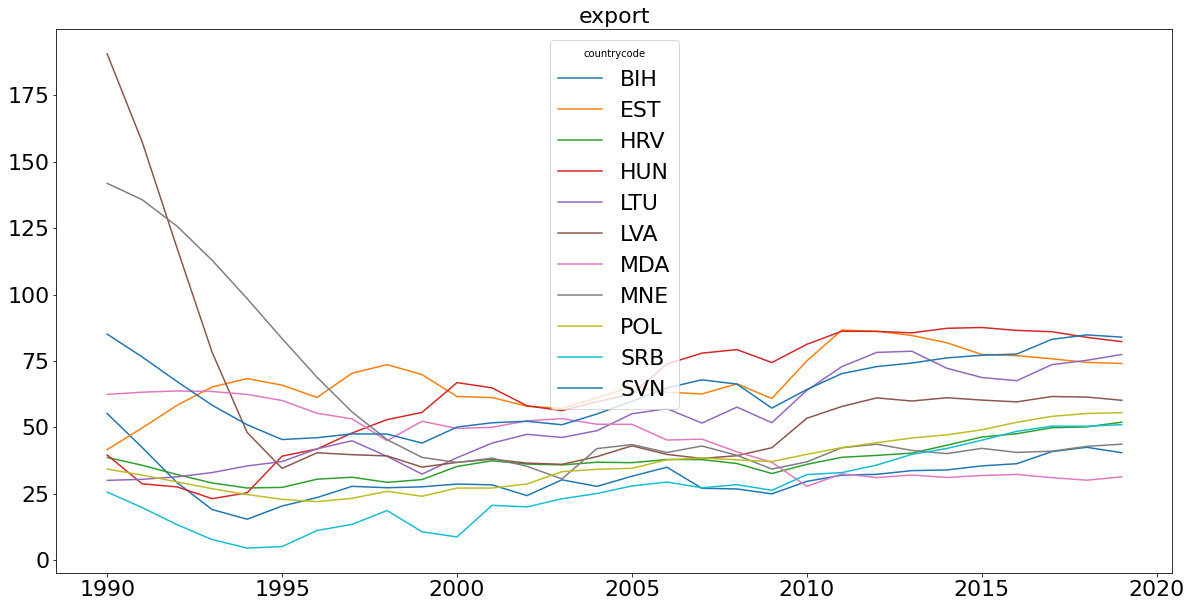

In [32]:
# data_exp = data[['year','export']].copy()
# data.loc[(data.year >= 2000) & (data.year < 2006), 'export'] = np.NaN

# data['export'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)].export, data_exp[(data.year >= 2000) & (data.year < 2006)].export)
# 83.8566

# data.export = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 17])
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)].export, data_exp[(data.year >= 2000) & (data.year < 2006)].export)
# 290.0548

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
# colors = ['blue' if x == 0 else 'red' for x in data_test.export]
data_test = data_test[data_test.export > 0].countrycode

data.export.interpolate(method = 'spline', order = 3, inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)].export, data_exp[(data.year >= 2000) & (data.year < 2006)].export)
# 32.7018

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='export').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='export')

###  Import - best imputation

<AxesSubplot:title={'center':'import'}>

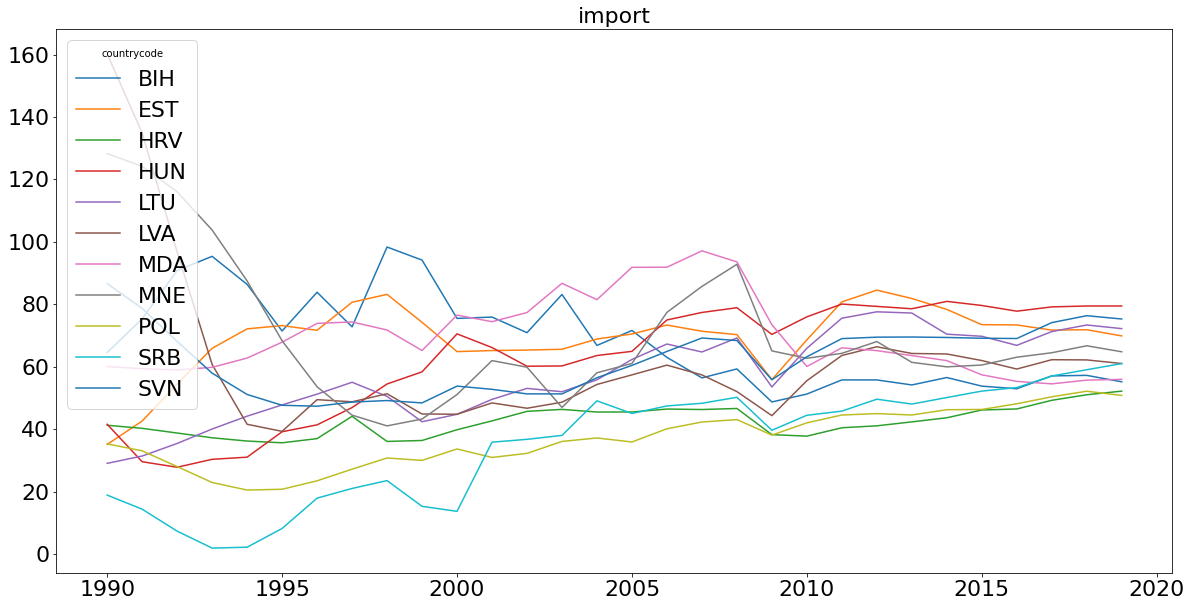

In [33]:
# data_imp = data[['year','import']].copy()
# data.loc[(data.year >= 2000) & (data.year < 2006), 'import'] = np.NaN

# data['import'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)]['import'], data_imp[(data_imp.year >= 2000) & (data_imp.year < 2006)]['import'])
# 101.4846

# data['import'] = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 18])
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)]['import'], data_imp[(data_imp.year >= 2000) & (data_imp.year < 2006)]['import'])
# 109.2971

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['import'] > 0].countrycode

data['import'].interpolate(method = 'polynomial',order = 2, inplace = True)
# mean_squared_error(data[(data.year >= 2000) & (data.year < 2006)]['import'], data_imp[(data_imp.year >= 2000) & (data_imp.year < 2006)]['import'])
# 46.2979

# data['import'].isna().sum()

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='import').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='import')

###  Inflation - best imputation

<AxesSubplot:title={'center':'inflation'}>

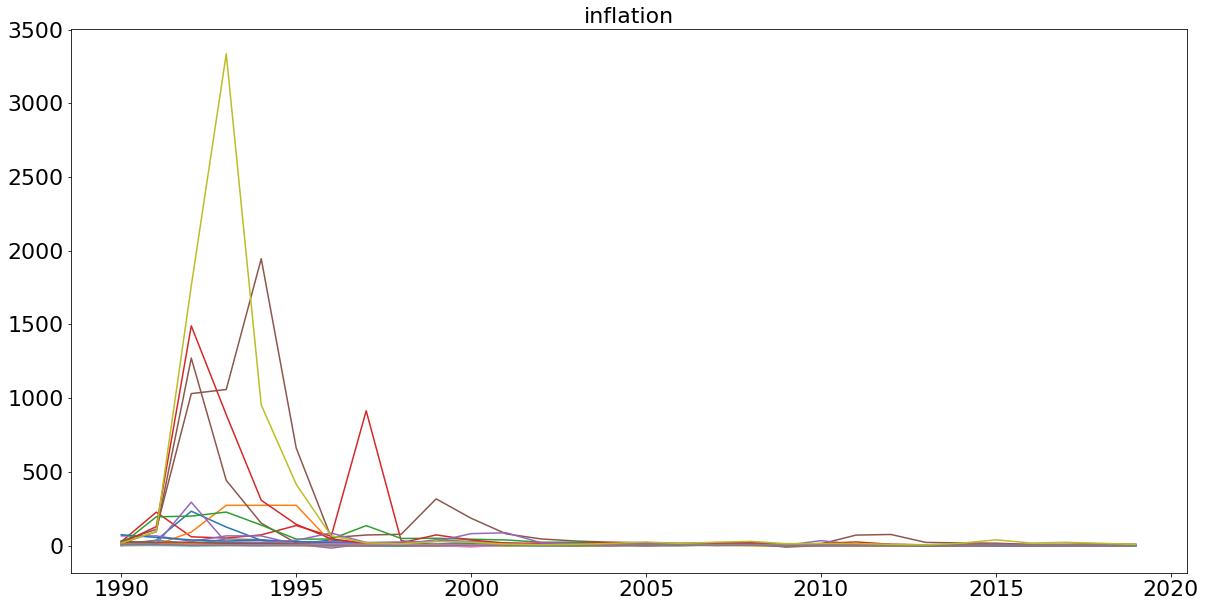

In [34]:
# data_inf = data[['year','inflation']].copy()
# data.loc[(data.year > 2000) & (data.year < 2006), 'inflation'] = np.NaN

# data['inflation'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year > 2000) & (data.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
# 78.3813

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['inflation'] > 0].countrycode

data['inflation'] = pd.Series(KNNImputer(n_neighbors=7).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 19])
# mean_squared_error(data[(data.year > 2000) & (data.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
# 116.4481

# data['inflation'].interpolate(method = 'spline', order = 1, inplace = True)
# mean_squared_error(data[(data.year > 2000) & (data.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
# 145.5979

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='inflation').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='inflation', legend = False)

###  HDI - best imputation

<AxesSubplot:title={'center':'hdi'}>

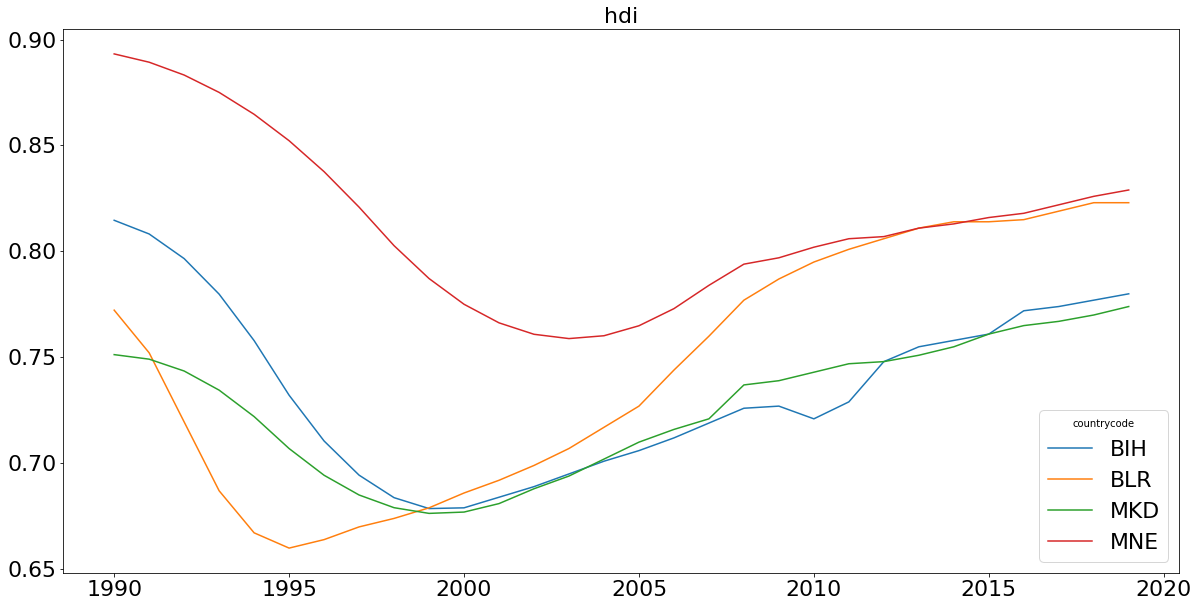

In [35]:
# data_hdi = data[['year','hdi']].copy()
# data.loc[(data.year > 2005) & (data.year < 2010), 'hdi'] = np.NaN

# data['hdi'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year > 2005) & (data.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
# 0.00015

# data['hdi'] = pd.Series(KNNImputer(n_neighbors=8).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 26])
# mean_squared_error(data[(data.year > 2005) & (data.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
# 0.00071

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['hdi'] > 0].countrycode

data['hdi'].interpolate(method = 'polynomial', order = 2, inplace = True)
# mean_squared_error(data[(data.year > 2005) & (data.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
# 0.00003

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='hdi').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='hdi')

### Net migration - best imputation

<AxesSubplot:title={'center':'net_migration'}>

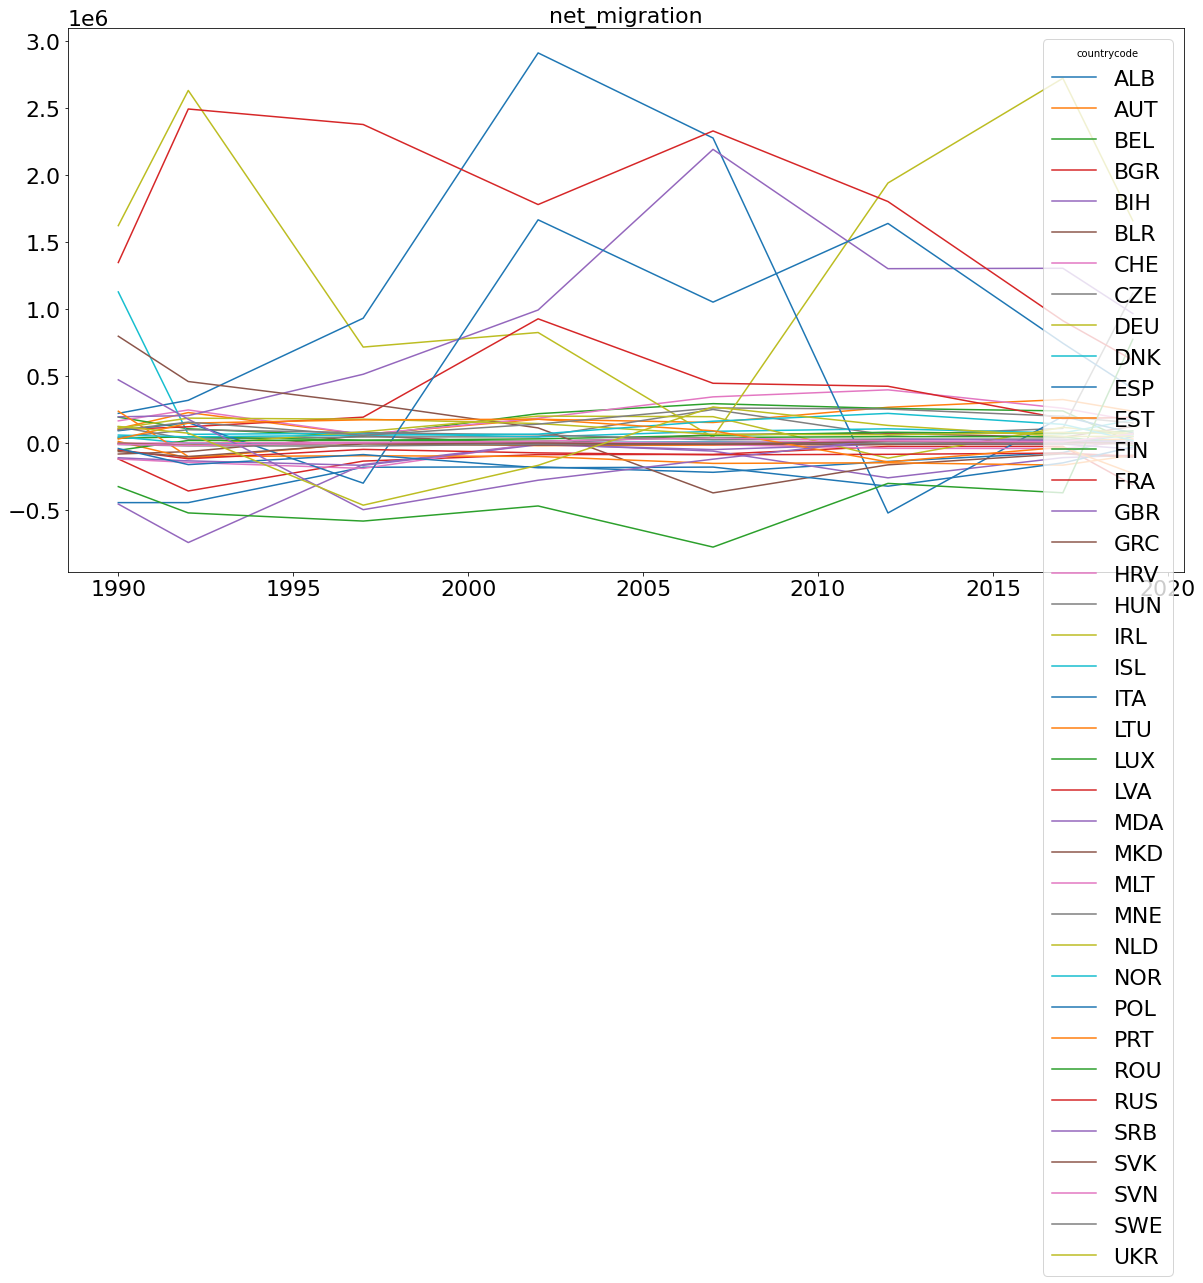

In [36]:
# data_net = data[['year','net_migration']].copy()
# data.loc[(data.year == 1997) | (data.year == 2007), 'net_migration'] = np.NaN

# data['net_migration'].fillna(method = 'ffill', inplace = True)
# mean_squared_error(data[(data.year == 1997) | (data.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
# 124854754745

data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['net_migration'] > 0].countrycode

# data['net_migration'] = pd.Series(KNNImputer(n_neighbors=10).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 20])
# mean_squared_error(data[(data.year == 1997) | (data.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
# 183449855546

data['net_migration'].interpolate(method = 'linear', inplace = True)
data['net_migration'].fillna(method = 'backfill', inplace = True)
# mean_squared_error(data[(data.year == 1997) | (data.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
# 113928087028

data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='net_migration').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='net_migration')

[-1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


<AxesSubplot:title={'center':'hdi'}>

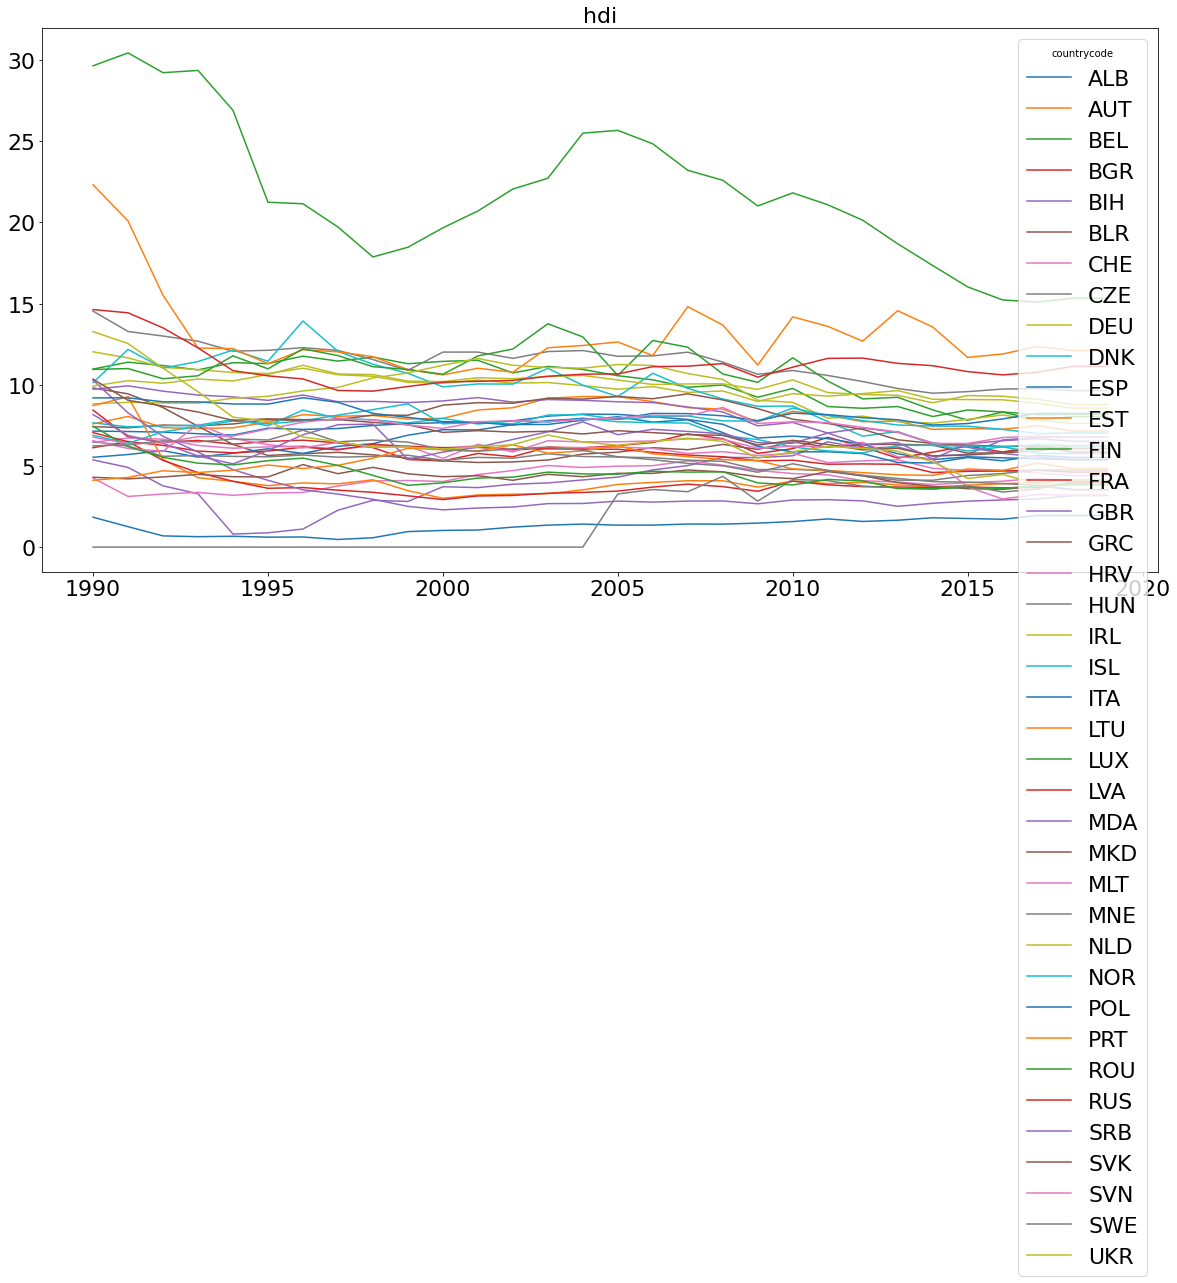

In [37]:
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='co2_emission').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')

fd = skfda.FDataGrid(df_test_final.T)
out_detector = skfda.exploratory.outliers.IQROutlierDetector(factor=5)
print(out_detector.fit_predict(fd))

df_test_final.T.plot(figsize=(20,10), title='hdi')

In [38]:
fig = px.choropleth(data, locations = 'countrycode', color = 'rgdpna', projection='conic conformal')
fig.update_geos(
    lataxis_range=[35, 75], lonaxis_range=[-15, 45]
)
fig.show()

In [39]:
# data = pd.read_csv('data/final_data.csv')
# data = data[data.year != 2020] # 16 out of 26 indexes missing

# data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
# data_test = data_test[data_test['inflation'] > 0].countrycode

# data['inflation'] = pd.Series(KNNImputer(n_neighbors=7).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 19])

# data_test = data[(data.countrycode.isin(data_test))]


# df_test = data_test[['countrycode','year', 'inflation']]

# # transposing
# df_test_transposed = df_test.pivot_table(index='countrycode', columns=['year'], values='inflation').reset_index()
# df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
# plt.rc('axes', titlesize=22)     # fontsize of the axes title
# plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
# plt.rc('legend', fontsize=22)    # legend fontsize
# plt.rc('figure', titlesize=40)  # fontsize of the figure title
# df_test_final.T.plot(figsize=(20,10))
# plt.title('Inflation values for European countries', size=26)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)
# plt.xlabel("year", size=24)
# plt.ylabel("inflation", size=24)